# LSTM

In [20]:
from jupyterquiz import display_quiz
import json
from base64 import b64encode
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# Introduction to Long Short-Term Memory (LSTM) Networks
The Challenge with Sequences in Machine Learning
In the realm of machine learning, dealing with sequential data presents unique challenges. Traditional models, like feedforward neural networks, assume that instances of data are independent of each other. However, this assumption falls short when the order of data points is significant. This is where recurrent neural networks (RNNs) come into play, designed to recognize patterns in sequences of data such as text, genomes, time series, and more.

Despite their design, RNNs struggle with long-term dependencies due to issues like vanishing and exploding gradients. This means they can forget earlier information in a sequence while processing new information, making it difficult to carry information across many time steps.

# Birth of LSTM Networks
Long Short-Term Memory networks, commonly known as LSTMs, are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Sepp Hochreiter and Jürgen Schmidhuber in 1997 and have been refined and popularized by many researchers in the field.

LSTMs are explicitly designed to avoid the long-term dependency problem, remembering information for long periods as a default behavior. They are remarkably effective, largely because of their special gating mechanism that controls the memorization process.

<span style="display:none" id="q1">W3sicXVlc3Rpb24iOiAiV2h5IGFyZSB0cmFkaXRpb25hbCBmZWVkZm9yd2FyZCBuZXVyYWwgbmV0d29ya3Mgbm90IHN1aXRhYmxlIGZvciBzZXF1ZW50aWFsIGRhdGE/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJUaGV5IGFzc3VtZSB0aGF0IGFsbCBpbnB1dHMgYXJlIGluZGVwZW5kZW50IG9mIGVhY2ggb3RoZXIuIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdCEgVHJhZGl0aW9uYWwgZmVlZGZvcndhcmQgbmV0d29ya3MgYXNzdW1lIGlucHV0IGluZGVwZW5kZW5jZSBhbmQgZG8gbm90IG1haW50YWluIHN0YXRlIGFjcm9zcyBpbnB1dHMuIn0sIHsiYW5zd2VyIjogIlRoZXkgY2FuIG9ubHkgcHJvY2VzcyBudW1lcmljYWwgZGF0YS4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBGZWVkZm9yd2FyZCBuZXVyYWwgbmV0d29ya3MgY2FuIHByb2Nlc3MgdmFyaW91cyB0eXBlcyBvZiBlbmNvZGVkIGRhdGEsIG5vdCBqdXN0IG51bWVyaWNhbC4ifSwgeyJhbnN3ZXIiOiAiVGhleSB1c2UgdG9vIG11Y2ggY29tcHV0YXRpb25hbCBwb3dlci4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBXaGlsZSBjb21wdXRhdGlvbmFsIHBvd2VyIGNhbiBiZSBhIGNvbmNlcm4sIGl0J3Mgbm90IHRoZSByZWFzb24gdGhleSBhcmUgdW5zdWl0YWJsZSBmb3Igc2VxdWVudGlhbCBkYXRhLiJ9LCB7ImFuc3dlciI6ICJUaGV5IGFyZSB0b28gZWFzeSB0byB0cmFpbi4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgZWFzZSBvciBkaWZmaWN1bHR5IG9mIHRyYWluaW5nIGlzIG5vdCB0aGUgaXNzdWUgd2hlbiBpdCBjb21lcyB0byBwcm9jZXNzaW5nIHNlcXVlbnRpYWwgZGF0YS4ifV19XQ==</span>

In [21]:
display_quiz("#q1")

<IPython.core.display.Javascript object>

<span style="display:none" id="q2">W3sicXVlc3Rpb24iOiAiV2hhdCBwcm9ibGVtIGRvIFJOTnMgZmFjZSB0aGF0IExTVE1zIGFyZSBkZXNpZ25lZCB0byBvdmVyY29tZT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIk92ZXJmaXR0aW5nIHRvIHRoZSB0cmFpbmluZyBkYXRhLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIE92ZXJmaXR0aW5nIGlzIGEgZ2VuZXJhbCBwcm9ibGVtIGluIG1hY2hpbmUgbGVhcm5pbmcgYnV0IG5vdCBzcGVjaWZpYyB0byB0aGUgcHJvYmxlbSBMU1RNcyBhcmUgZGVzaWduZWQgdG8gc29sdmUuIn0sIHsiYW5zd2VyIjogIlRoZSB2YW5pc2hpbmcgYW5kIGV4cGxvZGluZyBncmFkaWVudCBwcm9ibGVtLiIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIExTVE1zIGFyZSBkZXNpZ25lZCB0byBhdm9pZCBsb25nLXRlcm0gZGVwZW5kZW5jeSBpc3N1ZXMgbGlrZSB2YW5pc2hpbmcgYW5kIGV4cGxvZGluZyBncmFkaWVudHMuIn0sIHsiYW5zd2VyIjogIlRoZSBpbmFiaWxpdHkgdG8gcHJvY2VzcyBpbWFnZXMuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIGZvY3VzIG9mIExTVE1zIGlzIHNlcXVlbnRpYWwgZGF0YSwgbm90IGltYWdlIHByb2Nlc3NpbmcuIn0sIHsiYW5zd2VyIjogIkhpZ2ggbGF0ZW5jeSBpbiBwcmVkaWN0aW9ucy4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBMYXRlbmN5IGlzc3VlcyBhcmUgcmVsYXRlZCB0byBjb21wdXRhdGlvbmFsIGVmZmljaWVuY3ksIG5vdCB0aGUgZnVuZGFtZW50YWwgZGVzaWduIGNoYWxsZW5nZSBMU1RNcyBhZGRyZXNzLiJ9XX1d</span>

In [22]:
display_quiz("#q2")

<IPython.core.display.Javascript object>

# Structure of LSTM

Let's discuss how LSTM is designed and what makes it different from regular RNN. Firstly below is the overview for how looks LSTM cell visually.

![Simple LSTM Cell Diagram](LSTM_picture.png)
*Fig. 1: LSTM Cell Diagram*

[Source](https://medium.com/analytics-vidhya/lstms-explained-a-complete-technically-accurate-conceptual-guide-with-keras-2a650327e8f2)


The LSTM cell is a sophisticated unit within a neural network designed to process sequences and retain information over time. It consists of a cell state and a hidden state, which together facilitate the preservation and regulation of information.

The cell state acts as the memory of the LSTM, carrying information throughout the sequence of data. The hidden state serves as the output of the LSTM for each timestep, which can also be used for predictions.

Key components of the LSTM include:

- Input Gate: Controls the extent to which a new value flows into the cell state.
- Forget Gate: Decides what details are to be discarded from the cell state.
- Output Gate: Influences the amount of cell state information to include to the output at the current timestep.

The part of the LSTM that is similar to a regular RNN is the recurrent connection of the hidden state, which passes information from one step to the next.


# Mathematical Equations of the Gates and States of LSTM

$$
\mathbf{f}_t = \sigma(\mathbf{W}_f \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_f) \quad \text{(Forget Gate)}
$$
$$
\mathbf{i}_t = \sigma(\mathbf{W}_i \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_i) \quad \text{(Input Gate)}
$$
$$
\mathbf{\tilde{C}}_t = \tanh(\mathbf{W}_C \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_C) \quad \text{(Cell Candidate)}
$$
$$
\mathbf{C}_t = \mathbf{f}_t \odot \mathbf{C}_{t-1} + \mathbf{i}_t \odot \mathbf{\tilde{C}}_t \quad \text{(New Cell State)}
$$
$$
\mathbf{o}_t = \sigma(\mathbf{W}_o \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_o) \quad \text{(Output Gate)}
$$
$$
\mathbf{h}_t = \mathbf{o}_t \odot \tanh(\mathbf{C}_t) \quad \text{(New Hidden State)}
$$


In these equations:

- The sigmoid function is denoted by $\sigma$.
- Element-wise multiplication, known as the Hadamard product, is represented by $\odot$.
- Weight matrices are denoted with bold uppercase letters, such as $\mathbf{W}$, and bias vectors with bold lowercase letters, such as $\mathbf{b}$, for each gate respectively.
- Concatenation of vectors, like the previous hidden state and the current input vector at time $t$, is denoted by square brackets $[\mathbf{h}_{t-1}, \mathbf{x}_t]$.


2023-12-13 05:29:19.371863: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 05:29:19.371902: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 05:29:19.371954: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 05:29:19.384955: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 05:29:21.972713: I tensorflow/compiler/

Epoch 1/20


2023-12-13 05:29:26.781306: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-13 05:29:27.463893: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f6ed40da8a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-13 05:29:27.463952: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX150, Compute Capability 6.1
2023-12-13 05:29:27.473687: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-13 05:29:27.654831: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 [==============================] - 9s 17ms/step - loss: 0.0297 - val_loss: 0.0018
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 8.0959e-04 - val_loss: 4.7934e-04
Epoch 3/20
219/219 [==============================] - 3s 13ms/step - loss: 5.3058e-04 - val_loss: 3.2200e-04
Epoch 4/20
219/219 [==============================] - 3s 16ms/step - loss: 2.9549e-04 - val_loss: 4.0887e-04
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 1.6937e-04 - val_loss: 1.3778e-04
Epoch 6/20
219/219 [==============================] - 3s 14ms/step - loss: 7.7471e-05 - val_loss: 5.0922e-05
Epoch 7/20
219/219 [==============================] - 3s 15ms/step - loss: 2.1620e-05 - val_loss: 8.9440e-06
Epoch 8/20
219/219 [==============================] - 3s 14ms/step - loss: 7.6195e-06 - val_loss: 3.0462e-06
Epoch 9/20
219/219 [==============================] - 3s 12ms/step - loss: 5.7047e-06 - val_loss: 5.9566e-06
Epoch 10/20
219/219 [=================

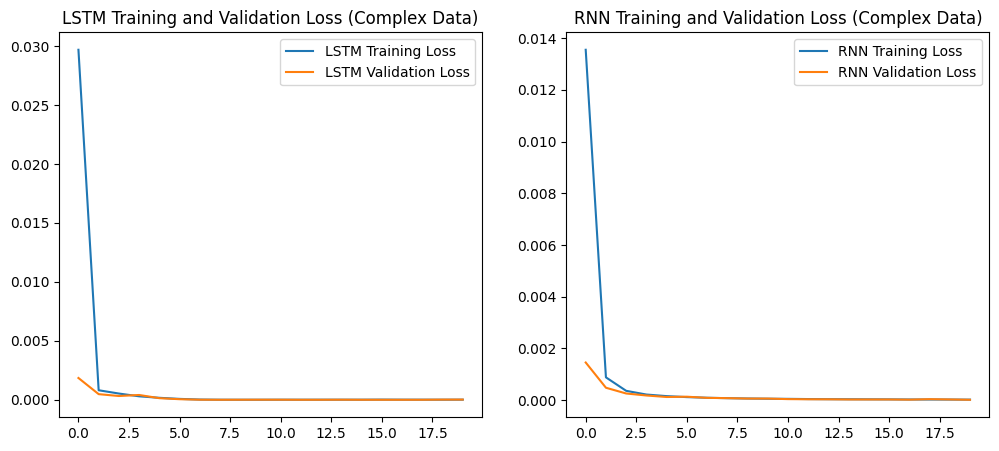

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense

# We will create a more complex synthetic time series with long-term dependencies
def generate_complex_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2, period = np.random.rand(5, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # wave 2
    series += 0.1 * np.sin(time * period * 2 * np.pi)              # long-term pattern
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)    # noise
    return series[..., np.newaxis].astype(np.float32)

def train_model(model, X_train, y_train, X_valid, y_valid):
    model.compile(loss="mse", optimizer="adam")
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
    return history


# Generating a more complex dataset
n_steps = 100  # longer sequence for capturing long-term dependencies
series = generate_complex_time_series(10000, n_steps)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

# Creating and training LSTM model for complex data
lstm_model_complex = Sequential([
    LSTM(20, return_sequences=True, input_shape=[None, 1]),
    LSTM(20),
    Dense(1)
])

lstm_history_complex = train_model(lstm_model_complex, X_train, y_train, X_valid, y_valid)

# Creating and training Simple RNN model for complex data
rnn_model_complex = Sequential([
    SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    SimpleRNN(20),
    Dense(1)
])

rnn_history_complex = train_model(rnn_model_complex, X_train, y_train, X_valid, y_valid)

# Plotting the training and validation loss for the complex models
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history_complex.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history_complex.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Training and Validation Loss (Complex Data)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history_complex.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history_complex.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Training and Validation Loss (Complex Data)')
plt.legend()

plt.show()


In [ ]:
# Generate predictions for LSTM and RNN models
lstm_predictions = lstm_model_complex.predict(X_test)
rnn_predictions = rnn_model_complex.predict(X_test)

# Create interactive plots
fig = px.line(title="LSTM vs. RNN Predictions")
fig.add_scatter(x=list(range(len(y_test))), y=y_test.ravel(), mode="lines", name="Actual Data", line=dict(color="blue"))
fig.add_scatter(x=list(range(len(lstm_predictions))), y=lstm_predictions.ravel(), mode="lines", name="LSTM Predictions", line=dict(color="green"))
fig.add_scatter(x=list(range(len(rnn_predictions))), y=rnn_predictions.ravel(), mode="lines", name="RNN Predictions", line=dict(color="red"))

fig.update_xaxes(title="Time Steps")
fig.update_yaxes(title="Value")
fig.show()
